# **SW03: Training, Validation, Testing**

In this Jupyter notebook, we look at the different possibilities how to 
set up a machine learning pipeline. First we learn how to split the data
into training and testing sets. Then we look at three different ways to
set up a machine learning pipeline:

- Discouraged: No splitting
- Okay practice: Train-test split
- Good practice: Train-validation-test split
- Recommended practice: Training with cross-validation
- Rolls-royce practice: Training with nested cross-validation

In the following, we will work once more with the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html), which you already have seen.

Before we create a machine learning pipeline, let's first see how we can split the initial dataset into subsets for training and testing.

---



In [1]:
# Basic imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Some Jupyter magic for nicer output
%config InlineBackend.figure_formats = ["svg"]   # Enable vectorized graphics

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import ml

from sklearn import datasets

In [2]:
X, y = datasets.load_iris(as_frame=True, 
                            return_X_y=True)

In [3]:
print(X,y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4   

## **Creating data splits**

In [13]:
########################
###    EXERCISE 1    ###
########################

# Split the data into training and test sets using your own implementation.
# The training set should contain 80% of the data, and the test set 20%.
# You are allowed to use numpy functions for this task.




In [4]:
########################
###    EXERCISE 2    ###
########################

# What is the problem with the below code?

def bad_shuffler_numpy(X, y):        
    n = len(X)
    split = int(0.8 * n)
    np.random.shuffle(X)
    np.random.shuffle(y)
    X_train_WRONG, X_test_WRONG = X[:split], X[split:]
    y_train_WRONG, y_test_WRONG = y[:split], y[split:]
    return X_train_WRONG, X_test_WRONG, y_train_WRONG, y_test_WRONG
    
X_np = X.to_numpy(copy=True)
y_np = y.to_numpy(copy=True)
ret = bad_shuffler_numpy(X=X_np, y=y_np)

Everything is simpler with scikit-learn:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# See how the size of the training and test sets compare:
print(f"Training set size: {len(X_train):>3}")
print(f"Test set size:     {len(X_test):>3}")
print(f"Total size:        {len(X):>3}")

Training set size: 120
Test set size:      30
Total size:        150


In [ ]:
########################
###    EXERCISE 3    ###
########################

# a) How to split a dataset into training and test sets such that the the ratio 
#    training and test set 3:1?

#test_size = 0.33

# b) We use the iris dataset which has 3 target classes (the different types 
#    of iris flowers). The complete dataset has 150, with 50 samples per class.
#    Will the ratio of the classes be preserved in the training and test sets?





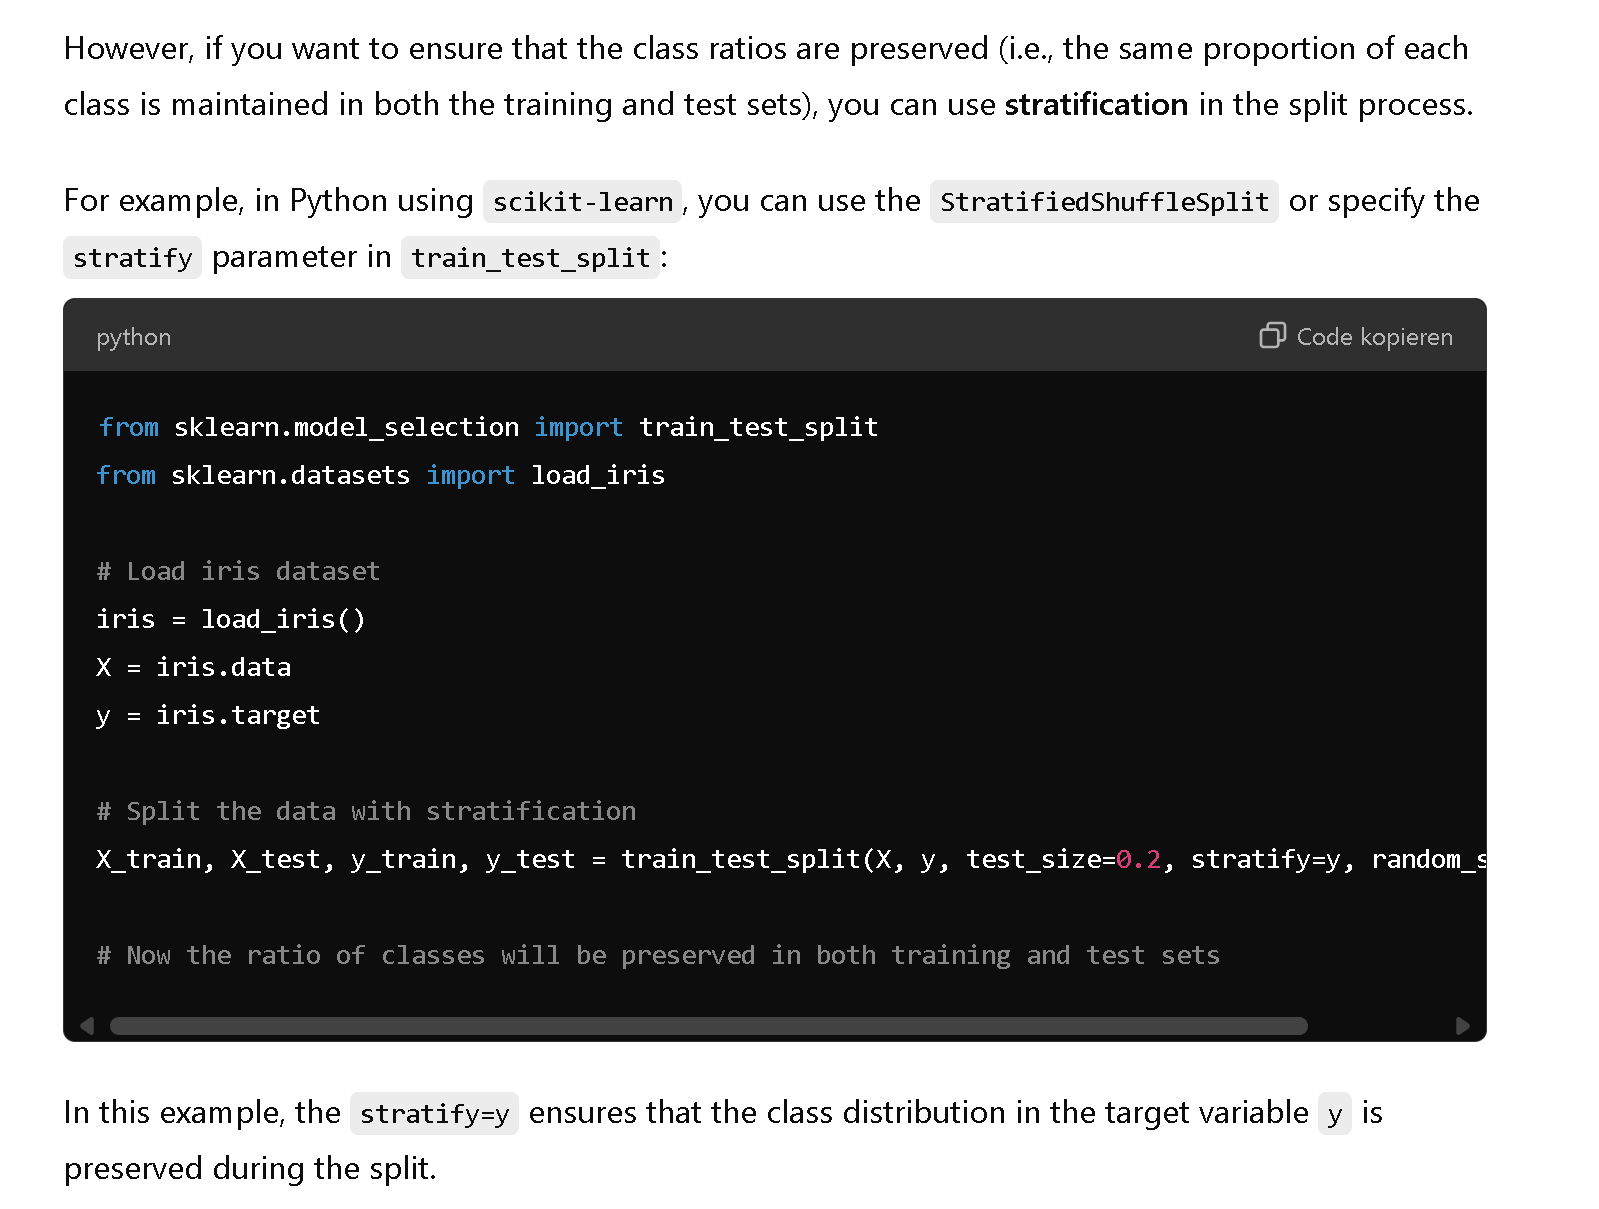

In [19]:
# Note that we get different shuffles each time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
display(X_train.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
display(X_train.head())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
149,5.9,3.0,5.1,1.8
107,7.3,2.9,6.3,1.8
12,4.8,3.0,1.4,0.1
106,4.9,2.5,4.5,1.7
139,6.9,3.1,5.4,2.1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
124,6.7,3.3,5.7,2.1
25,5.0,3.0,1.6,0.2
30,4.8,3.1,1.6,0.2
95,5.7,3.0,4.2,1.2
20,5.4,3.4,1.7,0.2


In [23]:
# For reproducing the same results, we can set the random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
display(X_train.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
display(X_train.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2



---

## **Splitting data for model development**

In the following, we are going to see different procedures to split the data
into training and testing sets. The most basic procedure is the train-test
split, where a fraction of the data is used for training and the rest for
testing. The use of a validation set is also common, where the data is split
into three sets: training, validation, and test sets. The validation set is
used to tune the hyperparameters of the model. Cross-validation is another 
common procedure, where the data is split into *multiple* training and test 
sets. This is useful to get a more robust estimate of the model's performance
on unseen data. Before introducing these procedures, we start with the 
discouraged practice of not splitting the data at all.

Note that the data is usually shuffled before splitting to ensure that the
training and test sets are representative of the data. When using random 
shuffling, it is a good practice to set the random_state parameter to ensure
reproducibility of the results.

We continue to work with the iris dataset. As it is a multi-class classification
problem, we are going to use the accuracy score to evaluate the model's
performance. The accuracy score is the fraction of correctly predicted samples
out of the total number of samples. It is defined as:

$$\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

where TP is the number of true positives, TN the number of true negatives, FP
the number of false positives, and FN the number of false negatives. We will
learn more about these concepts soon. Here, we will simply use the
[`accuracy_score(y_true, y_pred)`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.accuracy_score.html) 
function from scikit-learn to calculate the accuracy of the model, given the true 
target labels `y_true` and the predicted labels `y_pred`.



---
### **Method 1: No splitting (BAD)**


In [24]:
# Train a polynomial logistic regression model on the training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Create a pipeline that first transforms the data to include polynomial
# features, and then fits a logistic regression model to the data
model = make_pipeline(PolynomialFeatures(degree=2), 
                      LogisticRegression(max_iter=1000))
model.fit(X, y)

# Evaluate the model
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


Not to split the data is the simplest, but also the wrongest way to train and 
evaluate a model!

**The problem**: We have no way to evaluate the model on unseen 
data. How will it perform on new data? It seems to work well on the data we 
have used for training, but we might just have overfit the model to the 
training data. 

In [25]:
########################
###    EXERCISE 4    ###
########################

# Imagine we shuffle the data before training the model. Will the model
# performance be affected?
idx = np.arange(len(X))
np.random.seed(42)  # Set seed for reproducibility
np.random.shuffle(idx)
X, y = X.iloc[idx], y.iloc[idx]
# Yes it is better to break up muster and for better learning of the data

-----

### **Method 2: Train-test split**

This is the most basic way to split the model development process into
training and testing. 


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=41)

# Same type of model...
model = make_pipeline(PolynomialFeatures(degree=2), 
                      LogisticRegression(max_iter=1000))

# ...but this time we train the model on the training set.
model.fit(X_train, y_train)

# Now, we can evaluate the model on the test set!
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)

# If we want, we can compare the accuracy on the training set as well
y_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred)

print(f"Accuracy on training set (in-sample): {accuracy_train:.2f}")
print(f"Accuracy on test set (out-of-sample): {accuracy_test:.2f}")

Accuracy on training set (in-sample): 0.98
Accuracy on test set (out-of-sample): 1.00


This is a much better way to assess the perforamnce of the model, as it
gives us an idea of how well the model **generalizes** to **unseen data**.

In [15]:
########################
###    EXERCISE 5    ###
########################

# The accuracy on the training set is usually higher than the accuracy on the
# test set. Can you explain why?

#Die Genauigkeit auf dem Trainingsset ist in der Regel höher, weil das Modell die Trainingsdaten bereits gesehen hat und speziell auf diese angepasst wurde. Beim Testset hingegen muss das Modell auf unbekannte Daten generalisieren, was schwieriger ist, da es dort auf Muster stößt, die es noch nicht gesehen hat. Daher ist die Leistung auf dem Testset oft niedriger.

In [17]:
########################
###    EXERCISE 6    ###
########################

# In the previous exercise, we noted that the accuracy on the training set is
# usually higher than the accuracy on the test set. However, in some cases, the
# accuracy on the test set can be higher than the accuracy on the training set.
# Can you think of a reason why this might happen? 
#
# Hint: You can verify this with the above code by using a different seed point
# for the random number generator (random_state = ...)

# when the random state number is low the training test is better and from a point on the test set is always better so it depends on the random state


-----

### **Method 3: Train-test-validation split**

In the above example, we used a polynomial logistic regression model to
classify the iris dataset. In this model, we can tune the degree of the
polynomial features to improve the performance of the model. This tuning
parameter is not trained when we fit the model to the data, however it 
affects the performance of the model. Such a parameter is called a
**hyperparameter**.

In order to tune the hyperparameters of the model, we can use a **train-
validation-test split**. The training set is used to train the model, the
validation set is used to tune the hyperparameters of the model, and the
test set is used to evaluate the performance of the model.

Here is how we can create such a split:

In [31]:
# Split the data into training, test sets (ratio: 4:1)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, 
                                                          test_size=0.2, 
                                                          random_state=42)

# Split the training set further into training and validation sets (ratio: 3:1)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                                  test_size=0.25, 
                                                  random_state=42)

# Train the model on the training set and optimize the hyperparameters (here:
# the degree of the polynomial features) on the validation set.

degrees = [1, 2, 3, 4, 5]
accuracies = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree), 
                          LogisticRegression(max_iter=10000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)
    
print("Validation accuracies:")
for degree, accuracy in zip(degrees, accuracies):
    print(f" - Degree {degree}: {accuracy:.3f}")

# Find the best degree
best_degree = degrees[np.argmax(accuracies)]
print(f"\nBest degree: {best_degree}")

# Train the model on the training set (train+val) using the best degree.
model = make_pipeline(PolynomialFeatures(degree=best_degree), 
                      LogisticRegression(max_iter=1000))
model.fit(X_trainval, y_trainval)

# Evaluate the model on the test set.
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy_test:.3f}")

Validation accuracies:
 - Degree 1: 0.933
 - Degree 2: 0.933
 - Degree 3: 0.933
 - Degree 4: 0.900
 - Degree 5: 0.867

Best degree: 1

Accuracy on test set: 1.000


In [20]:
########################
###    EXERCISE 7    ###
########################

# Why is it a good idea to split the data into training, validation, and test
# sets when optimizing the hyperparameters of a model? Why should we not use
# the test set for hyperparameter optimization?



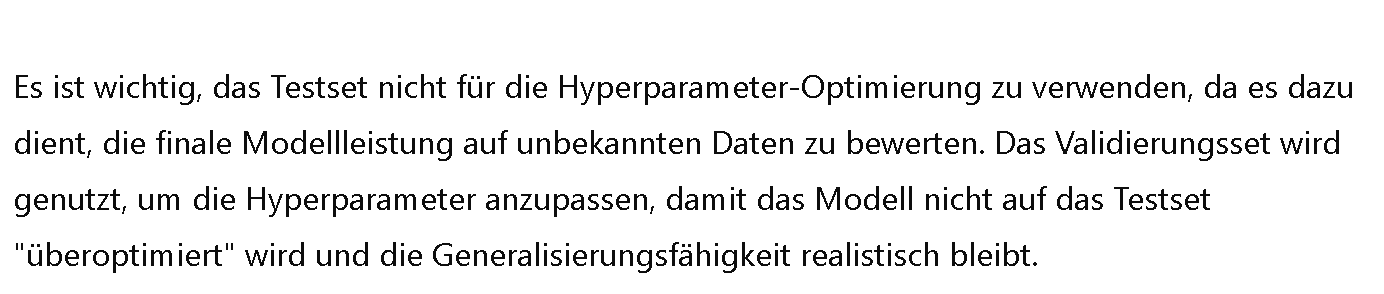


-----

### **Method 4: Cross-validation**

Cross-validation is a model evaluation technique that is used to estimate the
performance of a model on unseen data. It can be seen as a generalization of
the train-test split, where the data is split into multiple training and test
sets. Essentially, we split the data *k* different train-test splits, and
train and test the model on each of these splits. The performance of the model
is then averaged over all the splits to get an estimate of the performance of
the model on unseen data. Because we average the performance over multiple
splits, cross-validation provides a more reliable estimate of the performance
of the model than a single train-test split.

The term "cross-validation" is a bit misleading, as we use the technique to
evaluate (= *test*) the model, and to estimate its generalization error. The 
returned score values are computed on the *test* sets (not the training sets).

The concept of cross-validation is explained in more details in the following
sources:
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://machinelearningmastery.com/k-fold-cross-validation/ 

In [32]:
# Cross-validation
from sklearn.model_selection import (cross_val_score, 
                                     cross_validate)

# Create a pipeline that first transforms the data to include polynomial
# features, and then fits a logistic regression model to the data
model = make_pipeline(PolynomialFeatures(degree=2), 
                      LogisticRegression(max_iter=1000))

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print(f"Cross-validation scores:     {scores.round(2)}")
print(f"Mean cross-validation score:  {scores.mean():.2f}")

Cross-validation scores:     [1.   0.97 0.9  0.93 1.  ]
Mean cross-validation score:  0.96


In [33]:
# We can return more information from the cross-validation using the
# cross_validate() function instead of cross_val_score().
results = cross_validate(model, X, y, cv=5, scoring="accuracy",
                         return_train_score=True,
                         return_estimator=True)
print("Available info: ", results.keys())
print("Train scores:   Mean: %.2f %s" % (results["train_score"].mean(), 
                                         results["train_score"].round(2)))
print("Test scores:    Mean: %.2f %s" % (results["test_score"].mean(), 
                                         results["test_score"].round(2)))

Available info:  dict_keys(['fit_time', 'score_time', 'estimator', 'test_score', 'train_score'])
Train scores:   Mean: 0.99 [0.98 0.99 0.98 1.   0.98]
Test scores:    Mean: 0.96 [1.   0.97 0.9  0.93 1.  ]


In [34]:
# Note, by default, there is no shuffling of the data in cross-validation!
# To shuffle the data, and also to control the random seed, we can use the
# KFold object from scikit-learn. This is the instance that controls the 
# splitting of the data.
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(model, X, y, cv=cv, scoring="accuracy",
                         return_train_score=True,
                         return_estimator=True)
print("Available info: ", results.keys())
print("Train scores:   Mean: %.2f %s" % (results["train_score"].mean(), 
                                         results["train_score"].round(2)))
print("Test scores:    Mean: %.2f %s" % (results["test_score"].mean(), 
                                         results["test_score"].round(2)))

Available info:  dict_keys(['fit_time', 'score_time', 'estimator', 'test_score', 'train_score'])
Train scores:   Mean: 0.99 [0.98 0.98 0.98 0.99 1.  ]
Test scores:    Mean: 0.97 [1.   1.   1.   0.9  0.93]


In [25]:
########################
###    EXERCISE 8    ###
########################

# a) What is the difference between cross-validation and a train-test split?
# b) Why is cross-validation a better estimate of the model performance than a
#    train-test split?
# c) How many times will each sample be used for training in a 5-fold 
#    cross-validation? And how many times it will be used for testing?
# d) What is the difference between the train_score and test_score in the
#    cross_validate function?

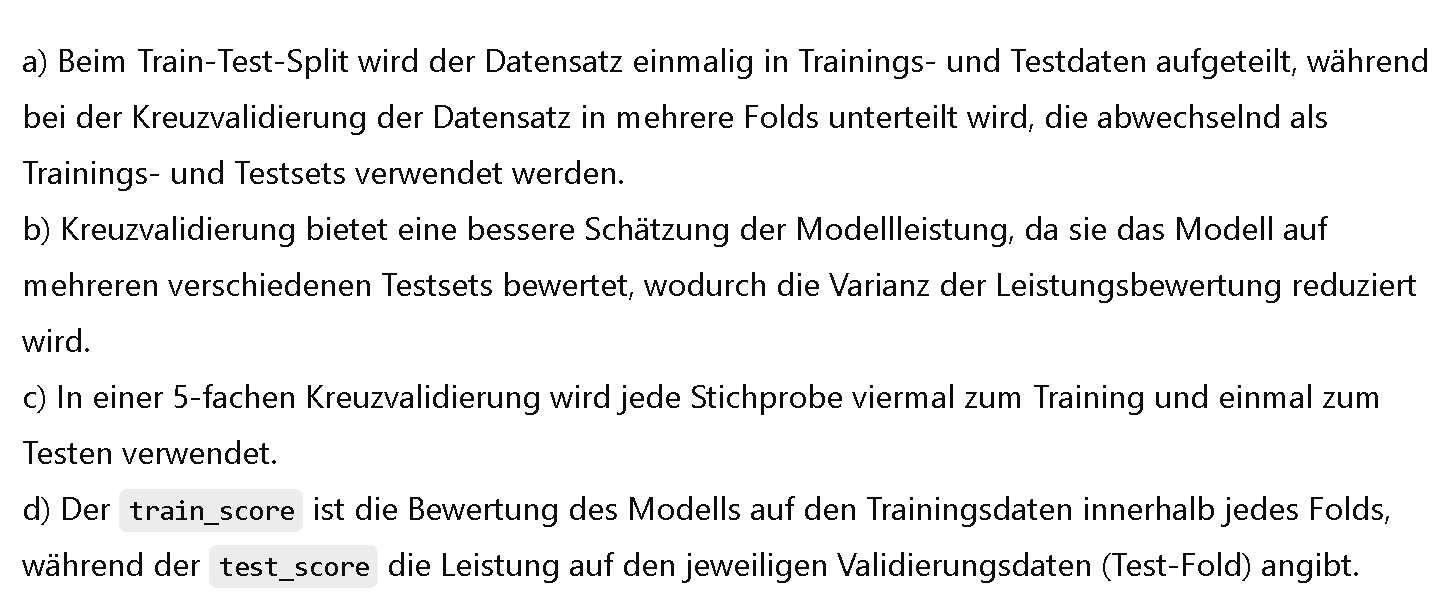


----
### **Method 5: Nested cross-validation**

We have seen how to generalize the train-test split to cross-validation.
We can also generalize the train-validation-test split to cross-validation.
This will lead to a so-called nested cross-validation scheme. Here, we will
use the inner cross-validation loop to optimize the hyperparameters of the
model, and the outer cross-validation loop to estimate the performance of the
model on new, unseen data.

We will revisit nested cross-validation when we discuss hyperparameter tuning
and model selection in more detail.

Further reading:
- Machine learning mastery: [Nested cross-validation for machine learning](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/)
- scikit-learn: [Nested vs. non-nested cross-validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html)

In [35]:
from sklearn.model_selection import GridSearchCV

# Inner cross-validation: Used to optimize the hyperparameters of the model
inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
# Outer cross-validation: Used to estimate the performance of the model
outer_cv = KFold(n_splits=5, shuffle=True, random_state=43)
# The model pipeline. Note that we do not specify the degree of the polynomial
# features here, as we will optimize this using grid search.
model = make_pipeline(PolynomialFeatures(), 
                      LogisticRegression(max_iter=10000))

# Parameters for grid search (degree of polynomial features).
# Because we are using a pipeline, we need to specify the parameter name
# using the name of the step in the pipeline, followed by two underscores.
p_grid = {"polynomialfeatures__degree": [1, 2, 3, 4, 5]}

# Perform grid search (inner cv) with k-fold cross-validation (outer cv)
classifier = GridSearchCV(estimator=model, 
                          param_grid=p_grid, 
                          cv=inner_cv, 
                          scoring="accuracy")
results = cross_validate(classifier, X=X, y=y, cv=outer_cv,
                         return_train_score=True)

print("Train scores:   Mean: %.2f %s" % (results["train_score"].mean(), 
                                         results["train_score"].round(2)))
print("Test scores:    Mean: %.2f %s" % (results["test_score"].mean(), 
                                         results["test_score"].round(2)))

Train scores:   Mean: 0.98 [0.98 0.98 0.98 0.99 0.98]
Test scores:    Mean: 0.97 [1.   1.   0.97 0.9  0.97]


In [27]:
########################
###    EXERCISE 9    ###
########################

# a) How many times will the model be trained and evaluated in the above code?
# b) How many times will each sample be used for training in the above nested
#    cross-validation setup? How many times will it be used for validation?
#    How many times will it be used for testing?
# c) What is the difference between the inner and outer cross-validation in
#    the above code?

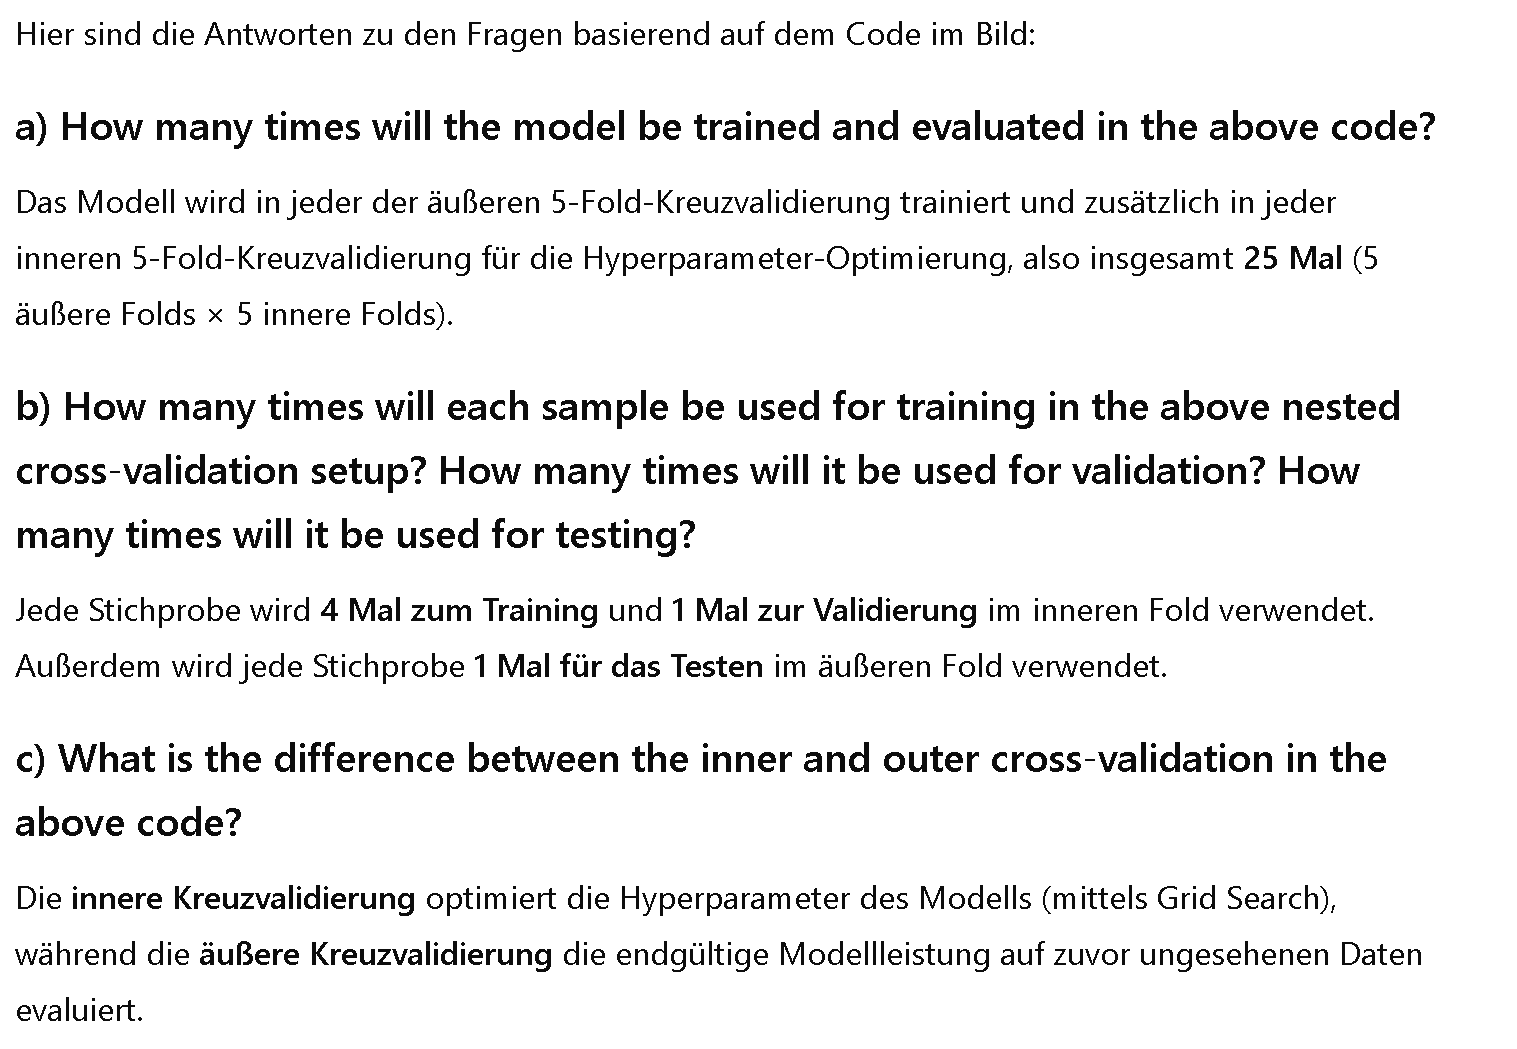


----

### **Other methods**

We have seen basic ways to split the data for cross-validation using k-fold 
splitting. There are many other schemes for splitting the data, which we 
will not cover in detail here:
- Leave-one-out 
- Leave-p-out 
- Shuffle-split
- Stratified split
- Group split

Further reading:
- scikit-learn: [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)